### Прогнозирование значений непрерывных целевых переменных с помощью регрессионного анализа

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

C:\Users\zekat\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.shape

(506, 14)

In [3]:
data.target.shape

(506,)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

#### Визуализация важных характеристик данных

Исследовательский анализ данных:

Графики рассеяния и гистограммы признаков:

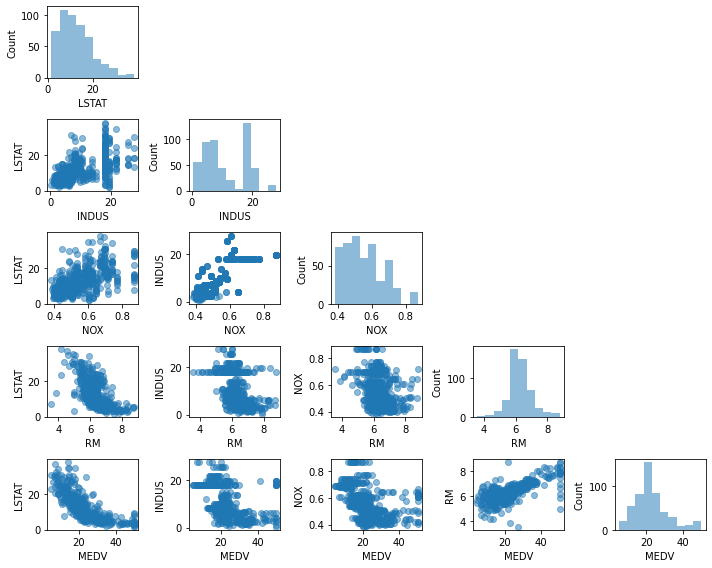

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

Корреляционная матрица в виде тепловой карты:

In [6]:
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

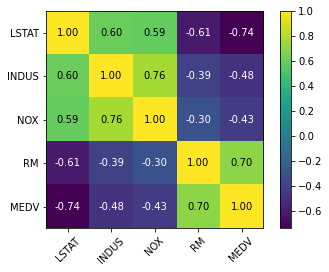

In [15]:
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

Линейную регрессию можно понимать, как Adaline без единичной ступенчатой функции активации:

In [16]:
class LinearRegressionGD():
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (pow(errors, 2).sum() / 2.0)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return self.net_input(X)

Простая линейная регрессия (одна переменная признака):

In [88]:
X = df[['RM']].values
y = df[['MEDV']].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()  # collaps to 1 dim matrix

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

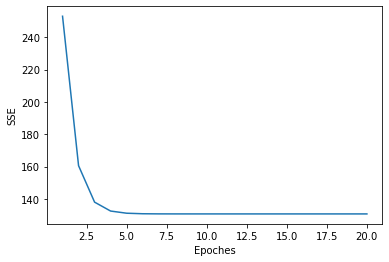

In [89]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoches')
plt.show()

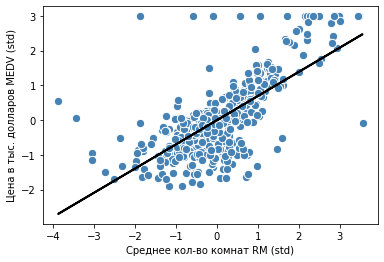

In [90]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Среднее кол-во комнат RM (std)')
plt.ylabel('Цена в тыс. долларов MEDV (std)')
plt.show()

In [93]:
X.min()

3.561

In [92]:
num_rums_std = sc_x.transform(np.array([[5]]))
price_std = lr.predict(num_rums_std)
print(f'Цена в тыс. долларов: {sc_y.inverse_transform([price_std])}')

Цена в тыс. долларов: [[10.83993289]]


Формально можно не обновлять веса точки пересечения, если данные для линейной регрессии стандартизированы, т.к. пересечение с осью y всегда будет равно 0:

In [94]:
print(f'Наклон: {lr.w_[1]}')
print(f'Точка пересечения: {round(lr.w_[0], 1)}')  # округление до десятых

Наклон: 0.6953594261783849
Точка пересечения: -0.0


### Линейная регрессия в scklearn

Реализация линейной регрессии в scklearn лучше работает с нестандартизированными переменными (не применяет оптимизацию на основе градиентного спуска). Используется обычный метод наименьших квадратов.

In [95]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Наклон: {slr.coef_[0]}')
print(f'Точка пересечения: {slr.intercept_}')

Наклон: [9.10210898]
Точка пересечения: [-34.67062078]


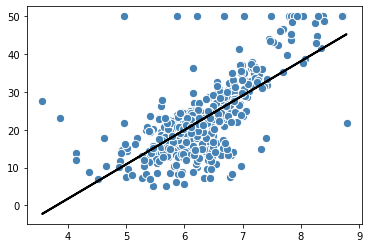

In [96]:
lin_regplot(X, y, slr)

### Подгонка надежной регрессионной модели с использоваием RANSAC

Присутствие выбросов негативно влияет на линейные регрессионные модели.
Random Sample Consensus (соглашение на основе случайных выборок) - подгоняет модель к поднабору данных, называемых не-выбросами (inlier).

Алгоритм RANSAC:
1) Выбрать случайное кол-во образцов, которые будут служить не-выбросами, выполнить подгонку модели.
2) Проверить все остальные точки даных, на подогнанной модели и добавить те точки, которые попадают внутрь предоставленного пользователем порога не-выбросов.
3) Повторно подогнать модель, используя все не-выбросы.
4) Оценить ошибку подогнанной модели относительно не-выбросов.
5) Закончить алгоритм, если эффективность достигна определенного порога или прошло фиксированное кол-во иттераций.

In [97]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,  # максимальное кол-во иттераций
                         min_samples=50,  # минимальное число образцов
                         loss='absolute_error',
                         # в пределах 5 единиц расстояния по вертикали
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

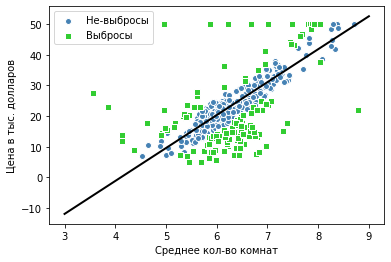

In [98]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Не-выбросы')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Выбросы')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Среднее кол-во комнат')
plt.ylabel('Цена в тыс. долларов')
plt.legend(loc='best')
plt.show()

In [99]:
print(f'Наклон: {ransac.estimator_.coef_[0]}')
print(f'Точка пересечения: {ransac.estimator_.intercept_}')

Наклон: [10.73450881]
Точка пересечения: [-44.08906429]


За счет применения RANSAC удалось уменьшить потенциальное влияние выбросов.
Но неизвестно, как покажет себя модель на не встречавшихся ранее данных.

## Оценка эффективности линейных регрессионных моделей

In [100]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0,)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Так как модель использует множетсво параметров невозможно визуализировать гиперплоскость.

Можно вывести зависимость остатков (разностей или расстояний по вертикали между действительными и спрогнозированными значениями) от спрогнозированных значений для диагностирования регрессионной модели.

Графики остатков  могут мопочь выявить нелинейность и выбросы, а также проверить, распределены ли ошибки по случайному закону.

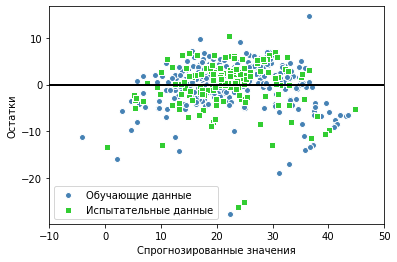

In [101]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Обучающие данные')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='best')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

В случае идеального прогноза остатки бы были нулевыми.

Для хорошей регрессионной модели можно ожидать, что ошибки распределены по случайному закону, а остатки должны быть случайным образом разбросаны вокруг средней линии. 

Если на графике есть повторяющиеся шаблоны, то это значит, что модель неспособна захватывать какую-то объясняющую информацию, которая просочилась в остатки (немного видно на рисунке)

### MSE - среднеквадратическая ошибка 

Вычисление меры MSE при обучении и испытании:

In [102]:
from sklearn.metrics import mean_squared_error
print(f'MSE при обучении: {mean_squared_error(y_train, y_train_pred)},\
       MSE при испытании: {mean_squared_error(y_test, y_test_pred)}')

MSE при обучении: 19.958219814238046,       MSE при испытании: 27.19596576688333


MSE на испытательном наборе больше, чем на обучающем, это сигналищирует о том, что в рассматриваемом случае модель переобучается с обучающими данными.

Интерпритация меры MSE зависит от масштабирования набора данных и признакоов.

### ${R^2}$ - коэффициент детерминации

Коэффециент детерминации R2 - стандатритированная версия MSE. Это доля дисперсии ответа, которая захватывается моделью:
$$R^2=1-\frac{SSE}{SST}$$
SSE - сумма квадратичных ошибок, а SST - полная сумма квадратов:
$$SST=\sum({y^{(i)}-mu_{y}})^2$$
SST - просто дисперсия ответа.

Для обучающего набора данных значение R2 ограничевается диапазонов от 0 до 1, но может статть отрицательным для испытательного набора данных.

Если R2 = 1, тогда модель идеально подогнана к данным и соответственно MSE = 0.

In [103]:
from sklearn.metrics import r2_score
print(f'R^2 при обучении: {r2_score(y_train, y_train_pred)},\
       R^2 при испытании: {r2_score(y_test, y_test_pred)}')

R^2 при обучении: 0.7645451026942549,       R^2 при испытании: 0.6733825506400181


## Использование регуляризированных методов для регрессии

Гребневая регрессия представляет собой штрафуемую с помощью L2 модель, где мы просто добавляем к функции потерь, основанной на методе наименьших квадратов, квадратичную сумму весов. Повышая значение гиперпараметра alpha мы увеличиваем силу регуляризации и сокращаем веса модели.

LASSO - здесь штраф L1 определяется как сумма абсолютных величин моделли. В зависимости от силы регуляризации веса могут стать нулевыми. Ограничение метода LASSO заключается в том, что он выбирает самое большое n признаков, если m>n, где n - кол-во обучающих образцов. LASSO позволяет избегать насыщенных моделей, если кол-во признаков = кол-во признаков.

Компромиссом между гребневой регрессией и LASSO является Эластичная сеть - предусматривает L1 и L2 штрафы.

In [134]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.18308575e-01,  4.61259764e-02, -2.08626416e-02,  2.45868617e+00,
       -8.25958494e+00,  3.89748516e+00, -1.79140171e-02, -1.39737175e+00,
        2.18432298e-01, -1.16338128e-02, -9.31711410e-01,  7.26996266e-03,
       -4.94046539e-01])

In [105]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.coef_

In [168]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [169]:
elnet.fit(X_train, y_train)
y_train_pred = elnet.predict(X_train)
y_test_pred = elnet.predict(X_test)

In [170]:
elnet.coef_

array([-0.08344408,  0.05179376, -0.01702468,  0.        , -0.        ,
        0.90890973,  0.01218953, -0.83010765,  0.23558231, -0.01502425,
       -0.84881663,  0.00687826, -0.72504946])

In [171]:
print(f'R^2 при обучении: {r2_score(y_train, y_train_pred)},\
       R^2 при испытании: {r2_score(y_test, y_test_pred)}')

R^2 при обучении: 0.7123645785314915,       R^2 при испытании: 0.6172050826795714


## Полиномиальная регрессия

1. Добавление полиномиального члена второй степени:

In [181]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0]).reshape((-1, 1))
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
              342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()
qudratic = PolynomialFeatures(degree=2)
X_quad = qudratic.fit_transform(X)

In [184]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

2. Подгонка простой линейной регрессии для сравнения:

In [191]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)

3. Подгонка множественной регрессии на трансформированных признаках для полиномиальной регрессии:

In [192]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(qudratic.fit_transform(X_fit))

4. График:

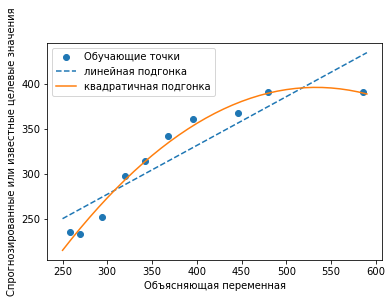

In [197]:
plt.scatter(X, y, label='Обучающие точки')
plt.plot(X_fit, y_lin_fit, label='линейная подгонка', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='квадратичная подгонка')
plt.xlabel('Объясняющая переменная')
plt.ylabel('Спрогнозированные или известные целевые значения')
plt.legend(loc='upper left')
plt.show()

In [201]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print(f'MSE при обучении линейной: {mean_squared_error(y, y_lin_pred)},\
       \nMSE при обучении квадратичной: {mean_squared_error(y, y_quad_pred)}')
print(f'R^2 при обучении линейной: {r2_score(y, y_lin_pred)},\
       \nR^2 при обучении квадратичной: {r2_score(y, y_quad_pred)}')

MSE при обучении линейной: 569.7796663183207,       
MSE при обучении квадратичной: 61.33021451744721
R^2 при обучении линейной: 0.8317053837891232,       
R^2 при обучении квадратичной: 0.9818850241163606


#### Моделирование нелинейных связей в наборе данных 

In [206]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [210]:
regr = LinearRegression()
# создание квадратичных признаков
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [219]:
# Подгонка к признакам (для графика)
X_fit = np.arange(X.min(), X.max()).reshape((-1, 1))

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quad_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

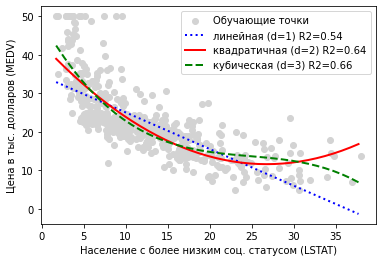

In [220]:
# вЫвод результатов
plt.scatter(X, y, label='Обучающие точки', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label=f'линейная (d=1) R2={round(linear_r2, 2)}',
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label=f'квадратичная (d=2) R2={round(quad_r2, 2)}',
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label=f'кубическая (d=3) R2={round(cubic_r2, 2)}',
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('Население с более низким соц. статусом (LSTAT)')
plt.ylabel('Цена в тыс. долларов (MEDV)')
plt.legend(loc='upper right')
plt.show()

Полиномиальные признаки не всегда являются наилучшим выбором для моделирования нелинейных связей. Например, взглянув на график рассеяния MEDV-LSRAR, можно выдвинуть гипотезу о том, что логарифмическое преобразование переменной LSTAT и квадратный корень MEDV могут спроецировать данные на линейное пространство признаков.

Если связь между двумя признаками выглядит похожей на экспоненциальную функцию:
$$f(x)=e^{-x}$$
Поскольку натуральный логарифм экспонинцеальной функции представляет собой прямую линию, мы предполагаем, что такое логарифмическое преобразование может здесь пригодиться:
$$log(f(x))=-x$$

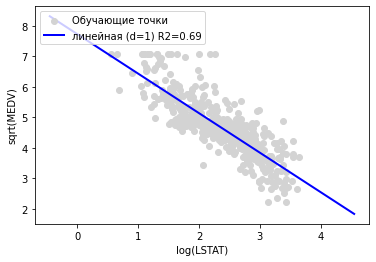

In [222]:
# трансформировать признаки
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# выполнить подгонку к признакам
X_fit = np.arange(X_log.min()-1,
                  X_log.max()+1, 1).reshape((-1, 1))
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# вывод результатов
plt.scatter(X_log, y_sqrt, label='Обучающие точки', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label=f'линейная (d=1) R2={round(linear_r2, 2)}',
         color='blue',
         lw=2)
plt.xlabel('log(LSTAT)')
plt.ylabel('sqrt(MEDV)')
plt.legend(loc='upper left')
plt.show()

Наилучшее значение метрики R2.

## Обработка нелинейных связей с использованием случайных лесов 

При работе с нелинейными данными дерево не требует каких либо трансформаций признаков

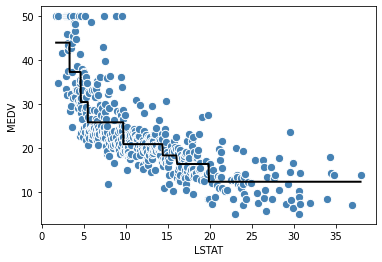

In [229]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

#### Регрессия на основе случайного леса 

Случайный лес в большенстве случаев характеризуется лучшей эффективностью обобщения, чем отдельно взятое дерево, благодаря случайности, которая помогает снизить дисперсию модели. Леса менее чувствительны к выбросам и не требуют объемной настройки параметров.

In [235]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.4,
                     random_state=1)

In [236]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print(f'MSE train: {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE test: {mean_squared_error(y_test, y_test_pred)}')
print(f'R2 train: {r2_score(y_train, y_train_pred)}')
print(f'MSE test: {r2_score(y_test, y_test_pred)}')

C:\Users\zekat\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 1.6436227042243663
MSE test: 11.085384101576372
R2 train: 0.9794626907930438
MSE test: 0.8772555925989014


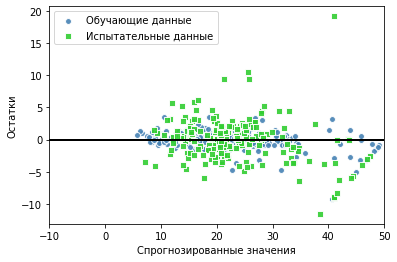

In [240]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            s=35,
            alpha=0.9,
            label='Обучающие данные')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            s=35,
            alpha=0.9,
            label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='best')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

Как уже было подытожено коэффициентом R2, по выбросам в направлении оси y мы видим, что модель подгоняется к обучающим данным лучше, чем к испытательным. К тому же распределение остатков вокруг ненулевой центральной точки не выглядит полностью случайным, указывая на то, что модель неспособна захватывать всю исследовательскую информацию. Однако график остатков выглядит лучше, чем график остатков линейной модели.

In [ ]:
417